### __Understanding the Problem__
_What is Customer Churn?_

> It refers to the rate of attrition at which the customers stop doing business with an entity. In our case, we are interested in finding out the customers who discontinue their subscription services from our telecoms industry.

With this in mind, the report aims to go through the following specific objectives, which shall also serve as guide in the structure of our report:

1. __Define the Problem.__ Measure the customer churning problem at hand in terms of churn rate and revenue churned.
2. __Identify Causes for Churning.__ Determine the causes and intention of customers to discontinue their services.
3. __High-Value Customers vs Churned Customers.__ The former are highly valuable and loyal to the company for their large contribution to revenue generation. An assessment among these two customer types can be conducted to find out how churned customers can be effectively and prospectively converted to high-value customers.
4. __Propose Recommendations.__ Provide recommendations that are consistently valid and justified in line with Steps 2 and 3.

### Preparing the Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.option_context('mode.use_inf_as_na', True)

In [3]:
df = pd.read_csv('C:/There/Stuff/Preset/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.rename(lambda x: x.lower().strip().replace(' ','_'), axis='columns', inplace=True)
df.drop(columns=['customer_id', 'zip_code', 'latitude', 'longitude'], inplace=True)

##### __1. Define the Problem__
An __revenue loss of 3.68M__ (accounting for 17% of the total revenue) is expected due to __customer churn rate of 26.54%__ (1869 out of 7043 customers). There appears to be significantly more churn among low spending customers.

In [5]:
df['total_revenue'].sum()

21371131.69

In [6]:
df['customer_status'].count()

7043

In [7]:
df.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [8]:
df.groupby(['customer_status', 'gender']).size()

customer_status  gender
Churned          Female     939
                 Male       930
Joined           Female     211
                 Male       243
Stayed           Female    2338
                 Male      2382
dtype: int64

##### __2. Identify Causes for Churning__
Row labels attributed to customers who 'Joined' will not be included for analysis in order to reduce noise in the visualizations while allowing for effective visual contrast between customers who 'Churned' and those who 'Stayed'.

In [9]:
dfc = df.loc[df['customer_status'] != 'Joined']

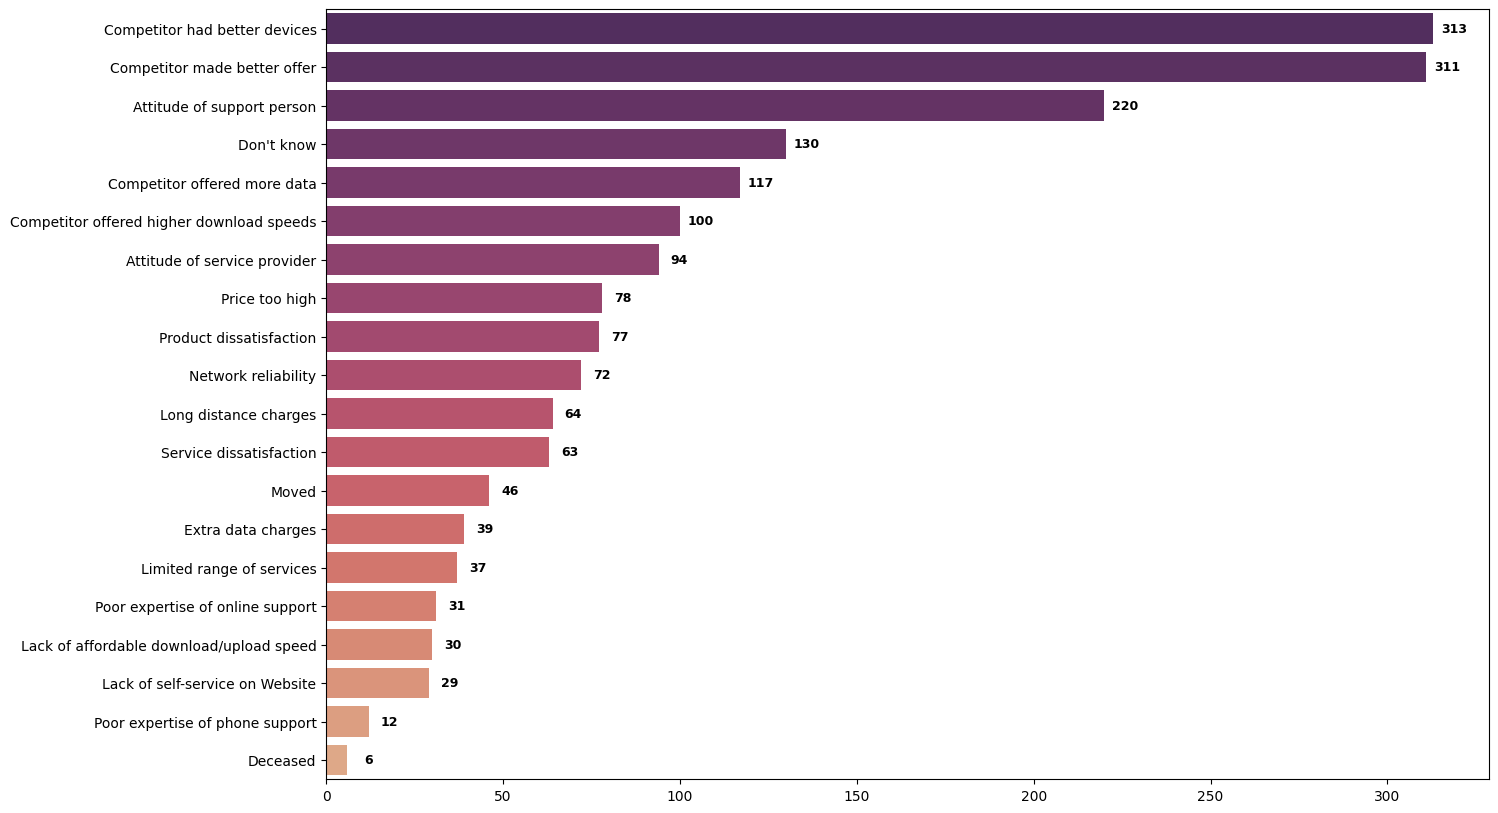

In [10]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(data=dfc, y=dfc['churn_reason'], order=dfc['churn_reason'].value_counts().index, palette='flare_r')
ax.set(xlabel= None, ylabel= None)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(15,0), weight='bold',
                fontsize=9, color='black', textcoords = 'offset points')

##### __2.5 EDA__

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

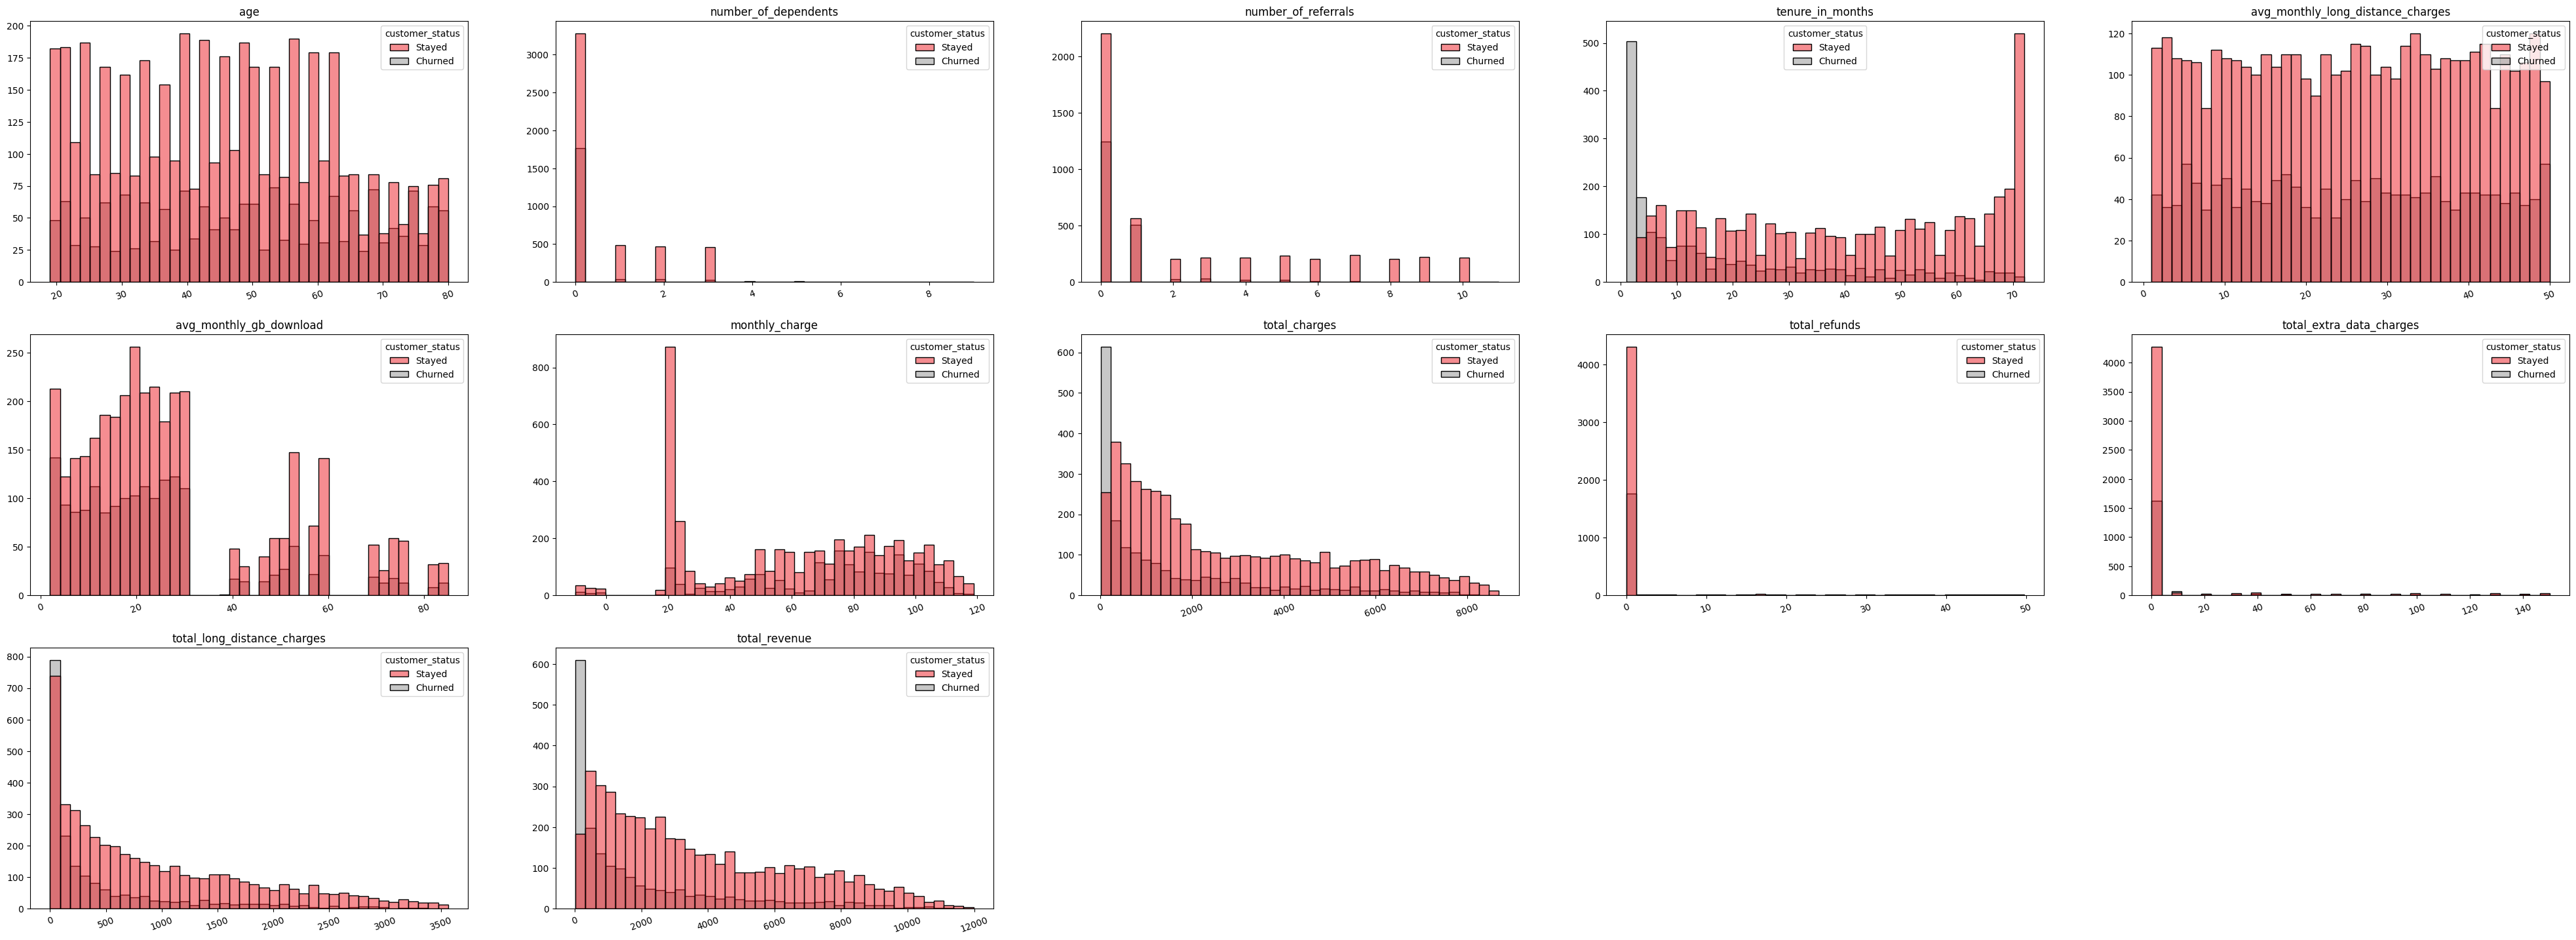

In [11]:
num = [cname for cname in dfc.columns if dfc[cname].dtype in ['int64', 'float64']]
dfc_num = dfc[num]

fig = plt.figure(figsize=(50,30))

i = 1
for n in dfc_num.columns:
    plt.subplot(5,5,i)
    ax = sns.histplot(x= dfc[n], hue= dfc['customer_status'], palette= ['#ED1C24', '#909090'], bins= 40)
    ax.set(xlabel= None, ylabel= None)
    plt.title(str(n), loc= None)
    plt.xticks(rotation= 20, fontsize= 10)
    i += 1

__Insights__
* `tenure_in_months`: Customer churn rate is highest within the first few months (5) of subscribing to the service.
* `total_charges and revenue`: In relation to their short duration of subscription, total amount charged to churned customers are relatively low compared to those who stayed, hence, lower revenue garnered.

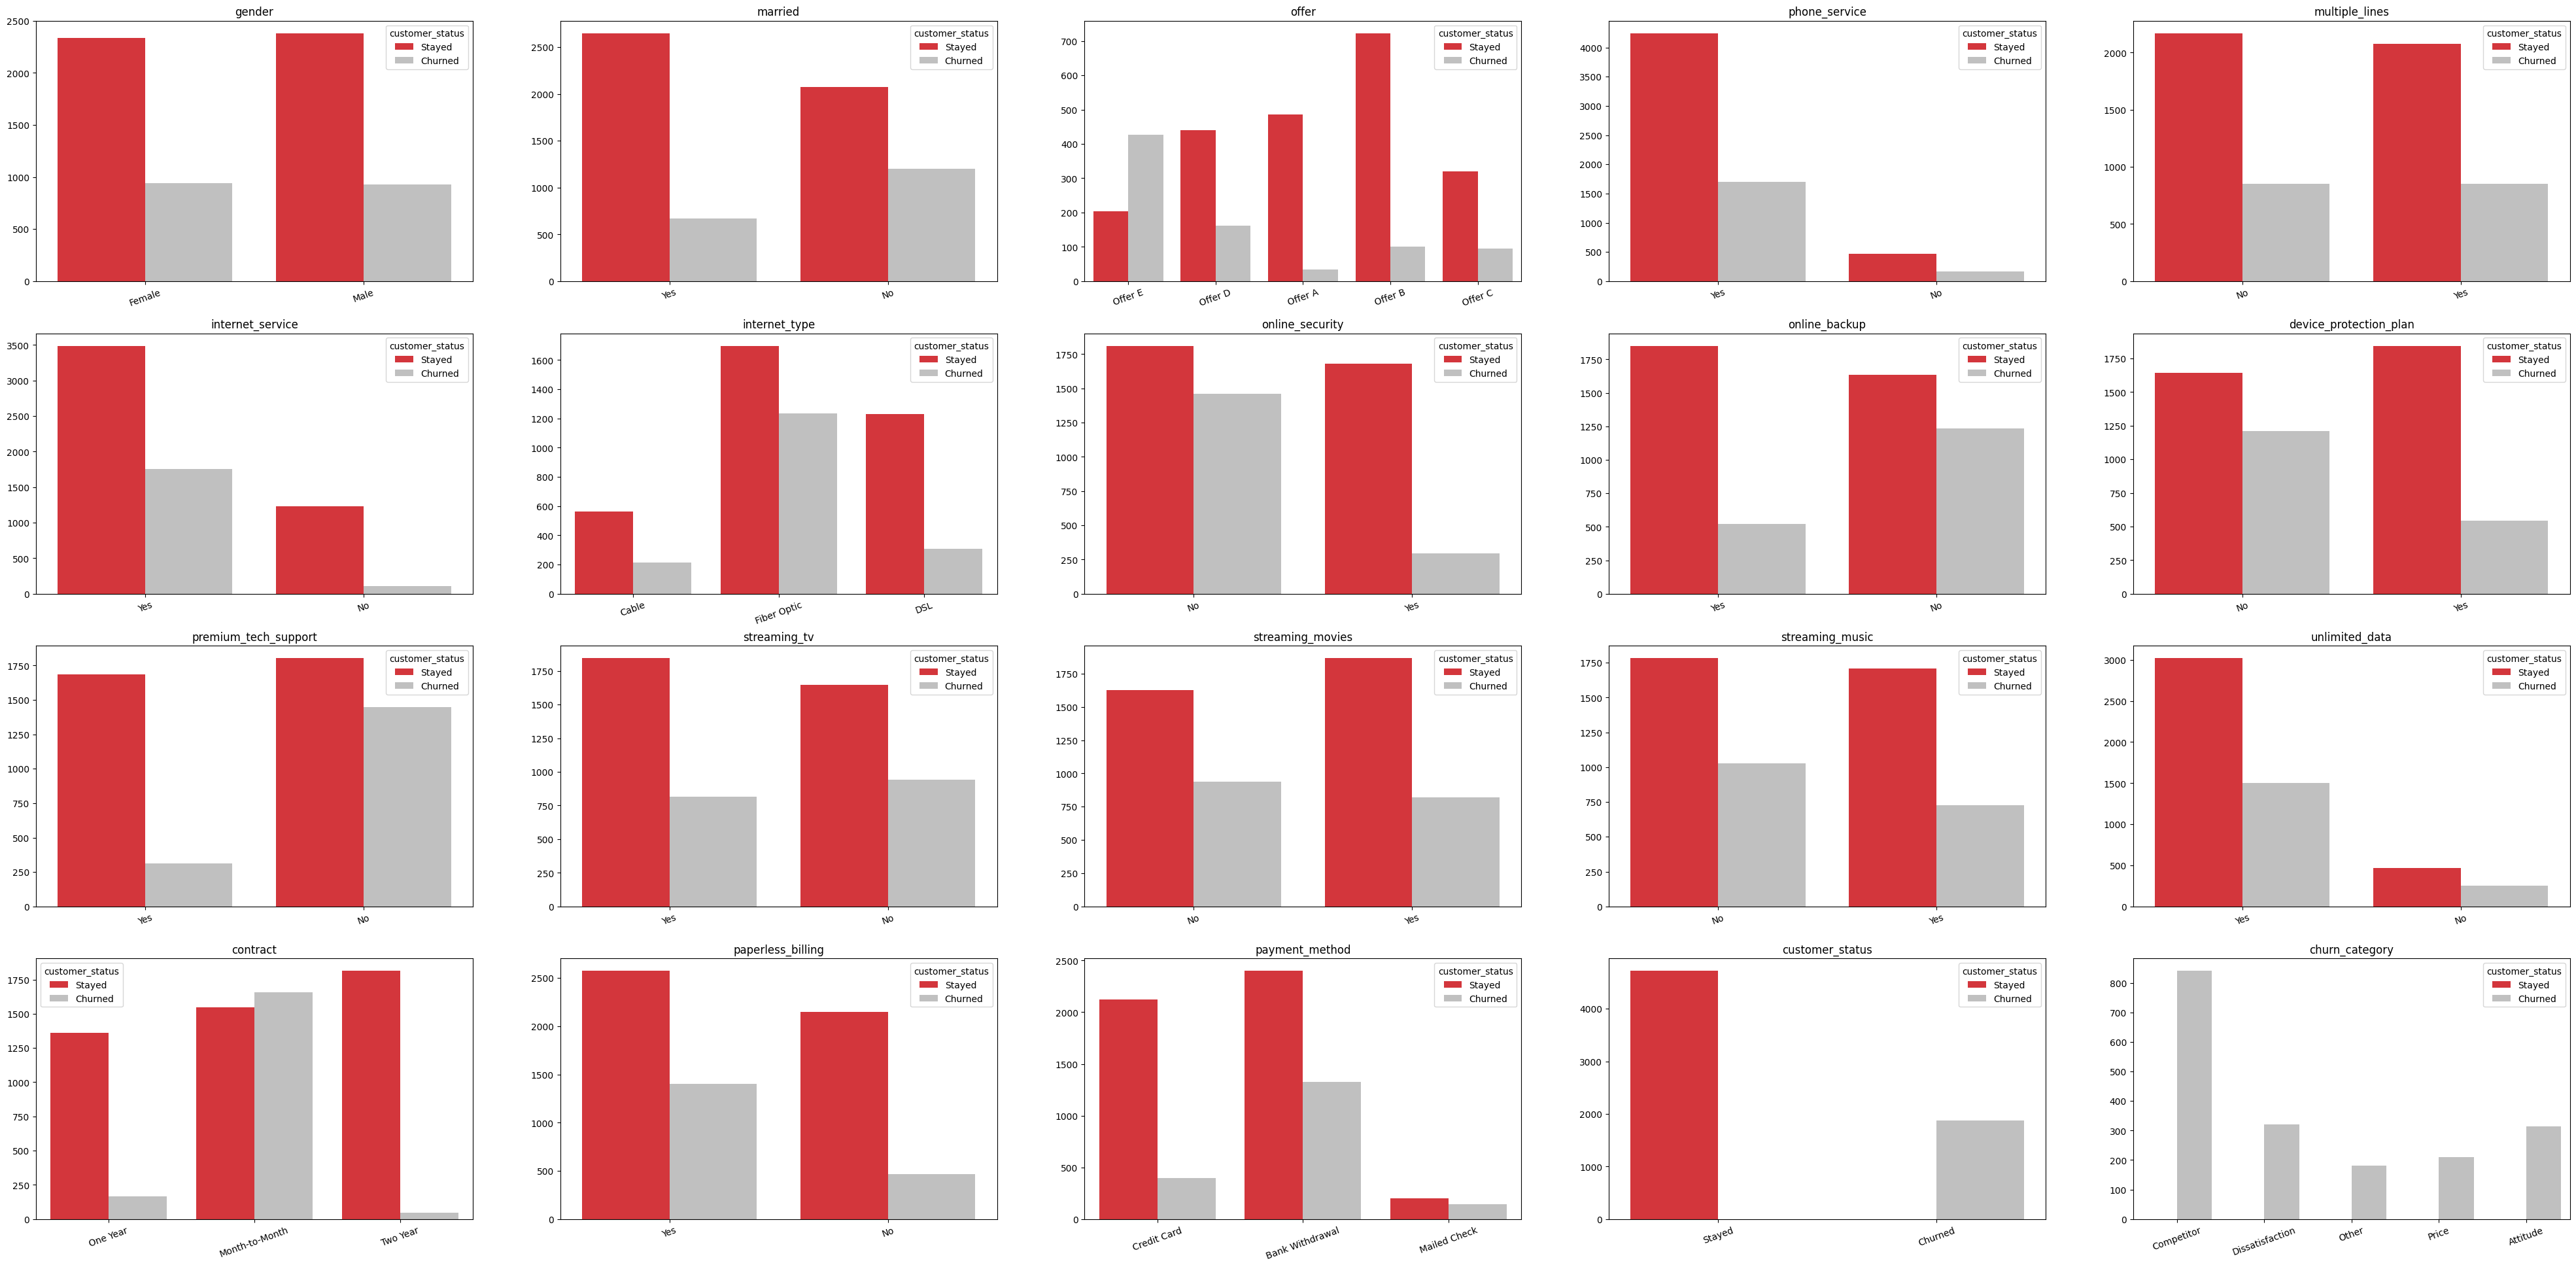

In [12]:
cat = [cname for cname in dfc.columns if dfc[cname].nunique() < 10 and dfc[cname].dtype == 'object']
dfc_cat = dfc[cat]

fig = plt.figure(figsize=(50,30))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5,5,i)
    ax = sns.countplot(data=dfc_cat, x=dfc_cat[c], hue=dfc_cat['customer_status'], palette=['#ED1C24', '#C0C0C0'])
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    i += 1

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_18732\3761476140.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=dfc_cat, x=dfc_cat[c], y=dfc_cat['customer_status'], linewidth=4, markers='o', ci=None, color='#ED1C24', )
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykern

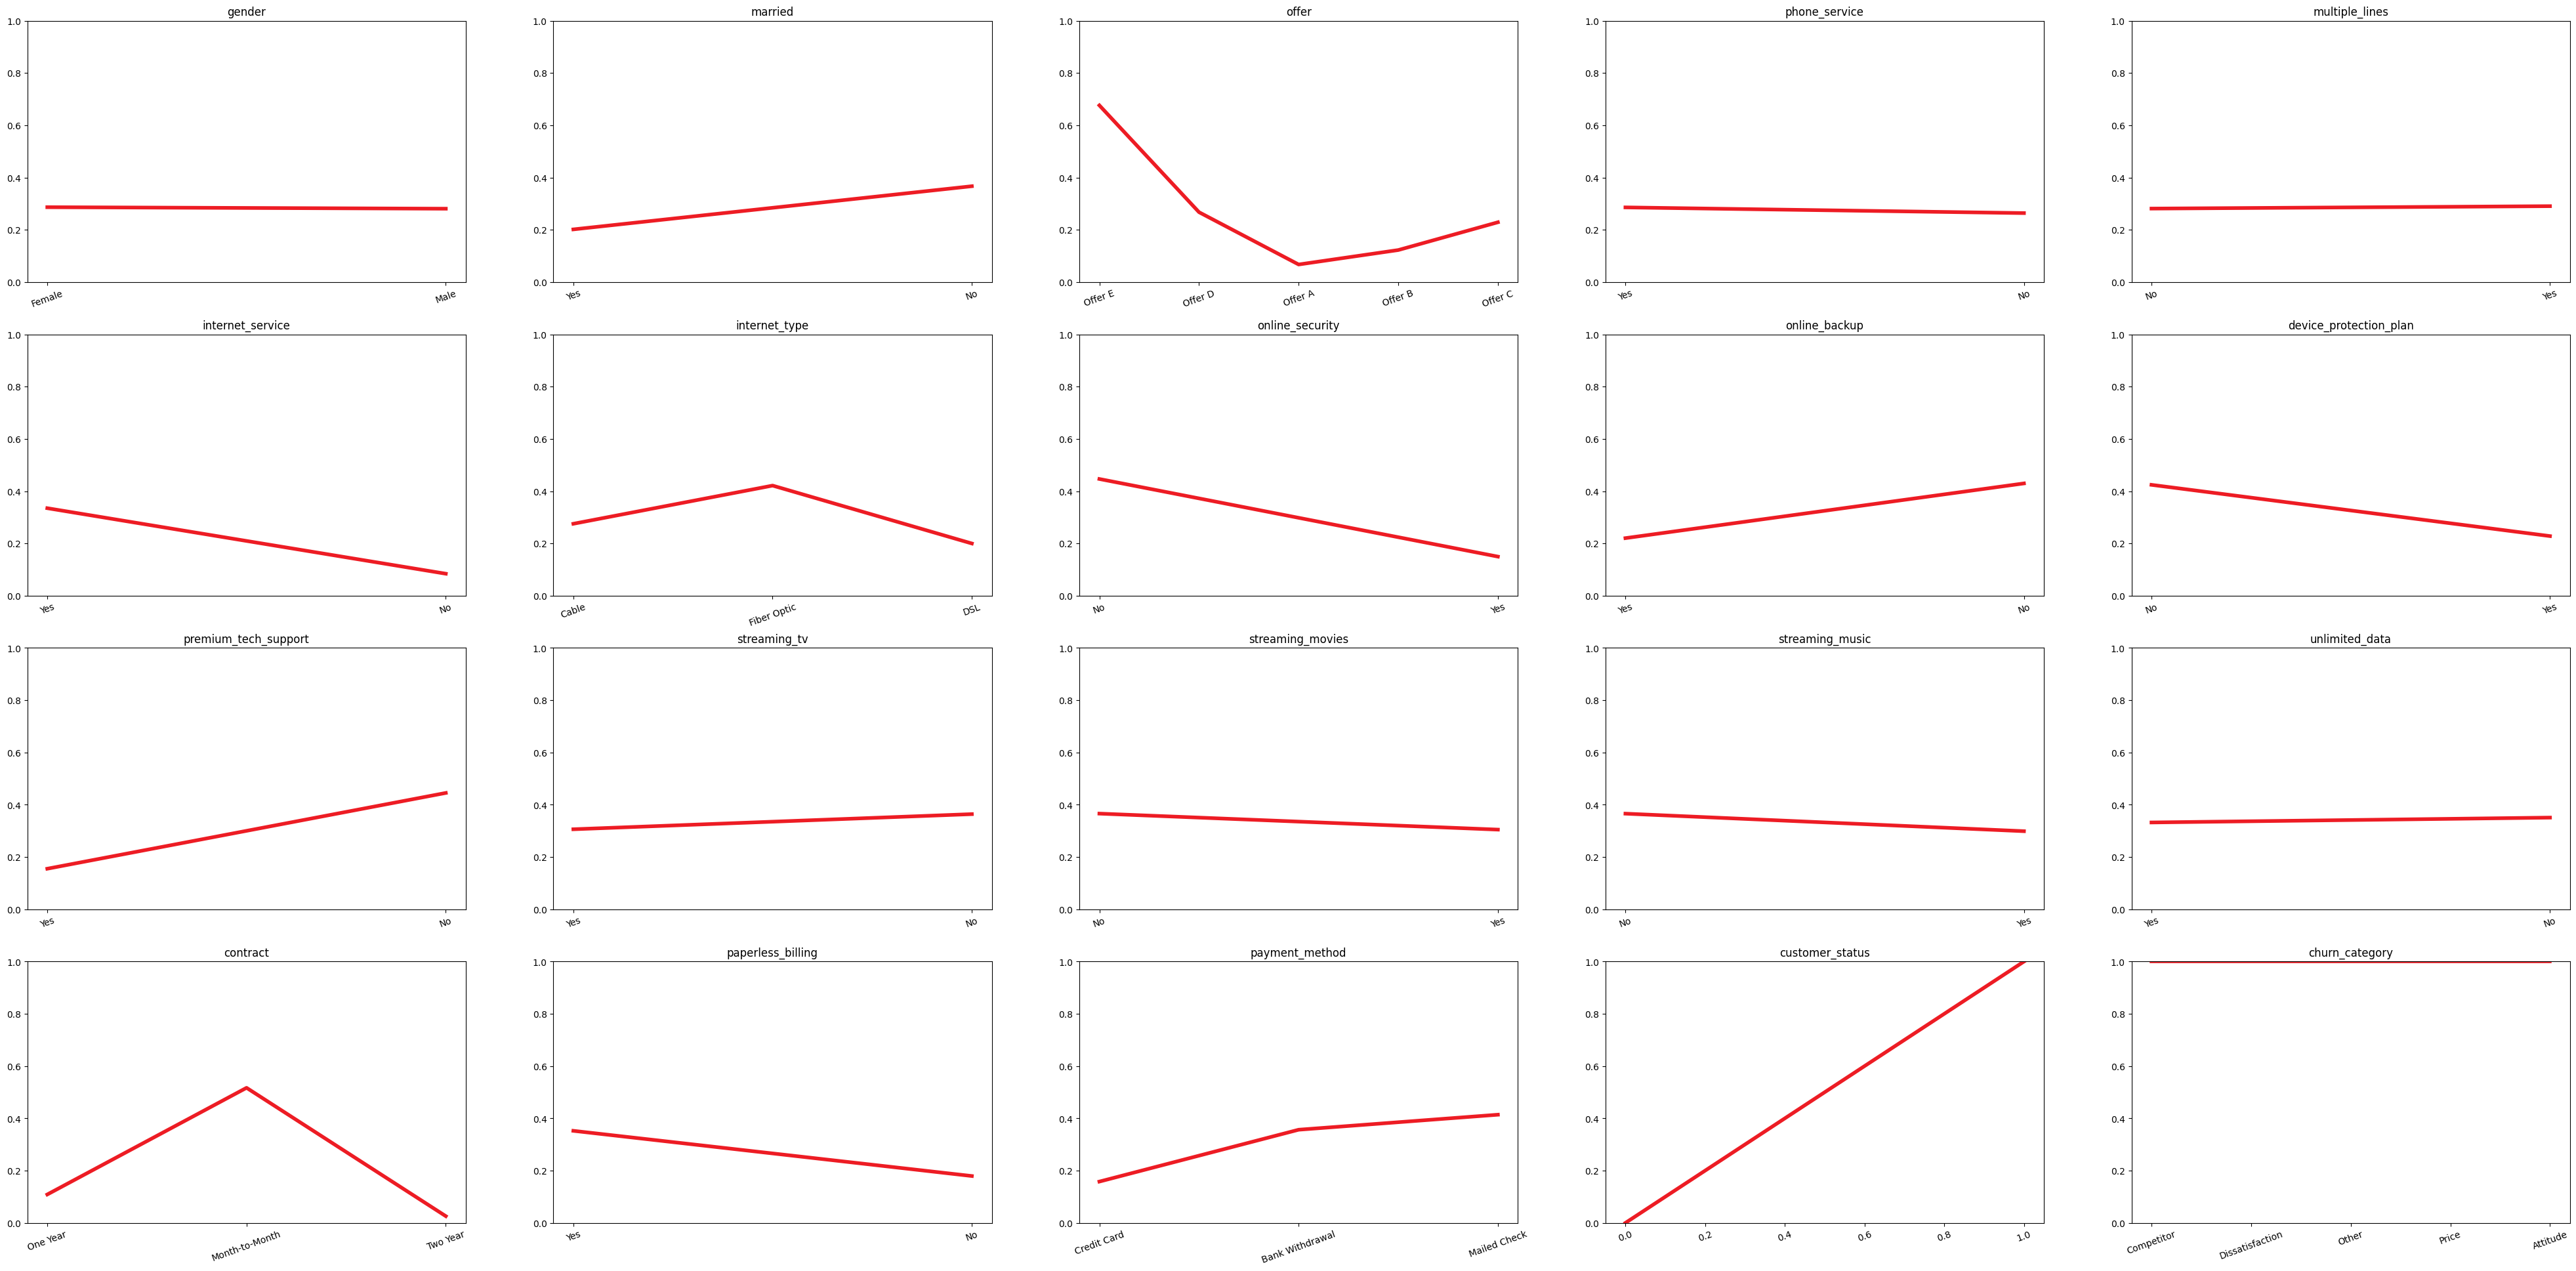

In [13]:
dfc.loc[dfc['customer_status'] == 'Stayed', 'customer_status'] = 0
dfc.loc[dfc['customer_status'] == 'Churned', 'customer_status'] = 1
dfc_cat = dfc[cat]
dfc_num = dfc[num]

fig = plt.figure(figsize=(50,30))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5,5,i)
    ax = sns.lineplot(data=dfc_cat, x=dfc_cat[c], y=dfc_cat['customer_status'], linewidth=4, markers='o', ci=None, color='#ED1C24', )
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.ylim(0,1)
    plt.xticks(rotation=20, fontsize=10)
    i += 1

__Insights__
* `offer`: Most customers didn't accept marketing offers. The marketing team may want to improve on this low conversion rate. Unfortunately, no information were provided about the complete details of each offer, although we do observe high customer churn rate after subscribing to Offer E.
* `internet_service`. Higher churn rate with subscriptions to internet service. Anecdotally, there are several causes related to internet services that can lead to customer dissatisfaction. One of the most frequent examples include slow internet conncetion.
* `internet_type`: Of the various internet connection types, Fiber Optic is the most popular, for it had the fastest download and upload speeds compared to cable and DSL at the expense of higher prices. However, Fiber Optic users are also the most likely to discontinue the connection service.
* `contract`: It makes sense that contracts set for longer timeframes either up to one or two years discourage the subscribers to discontinue their service. On the contrary, users are likely to churn if they opt to pay at a monthly basis.
Subsribing to any of the additional internet services (i.e. online security, backup, device protection plan, etc.) appears to considerably reduce the customer churn rate by a certain percentage.

##### __3. High-Value Customers vs Churned Customers__
Customers who contributed above the average revenue of the company and those who stayed are treated as high-value and loyal customers.

In [14]:
dfc['total_revenue'].mean()

3235.2180816512373

In [15]:
dfc['high_value'] = 0
dfc.loc[(dfc['total_revenue'] > dfc['total_revenue'].mean()) & (dfc['customer_status'] == 0), 'high_value'] = 'High Value'


C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_18732\2782770607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['high_value'] = 0
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_18732\2782770607.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High Value' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc.loc[(dfc['total_revenue'] > dfc['total_revenue'].mean()) & (dfc['customer_status'] == 0), 'high_value'] = 'High Value'


High value customers belong to the top __33.34%.__

In [16]:
dfc['high_value'].value_counts()

high_value
0             4392
High Value    2197
Name: count, dtype: int64

In [17]:
df_high_value = dfc[dfc['high_value'] == 'High Value']

##### __High-Value Customers Profile__

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\s

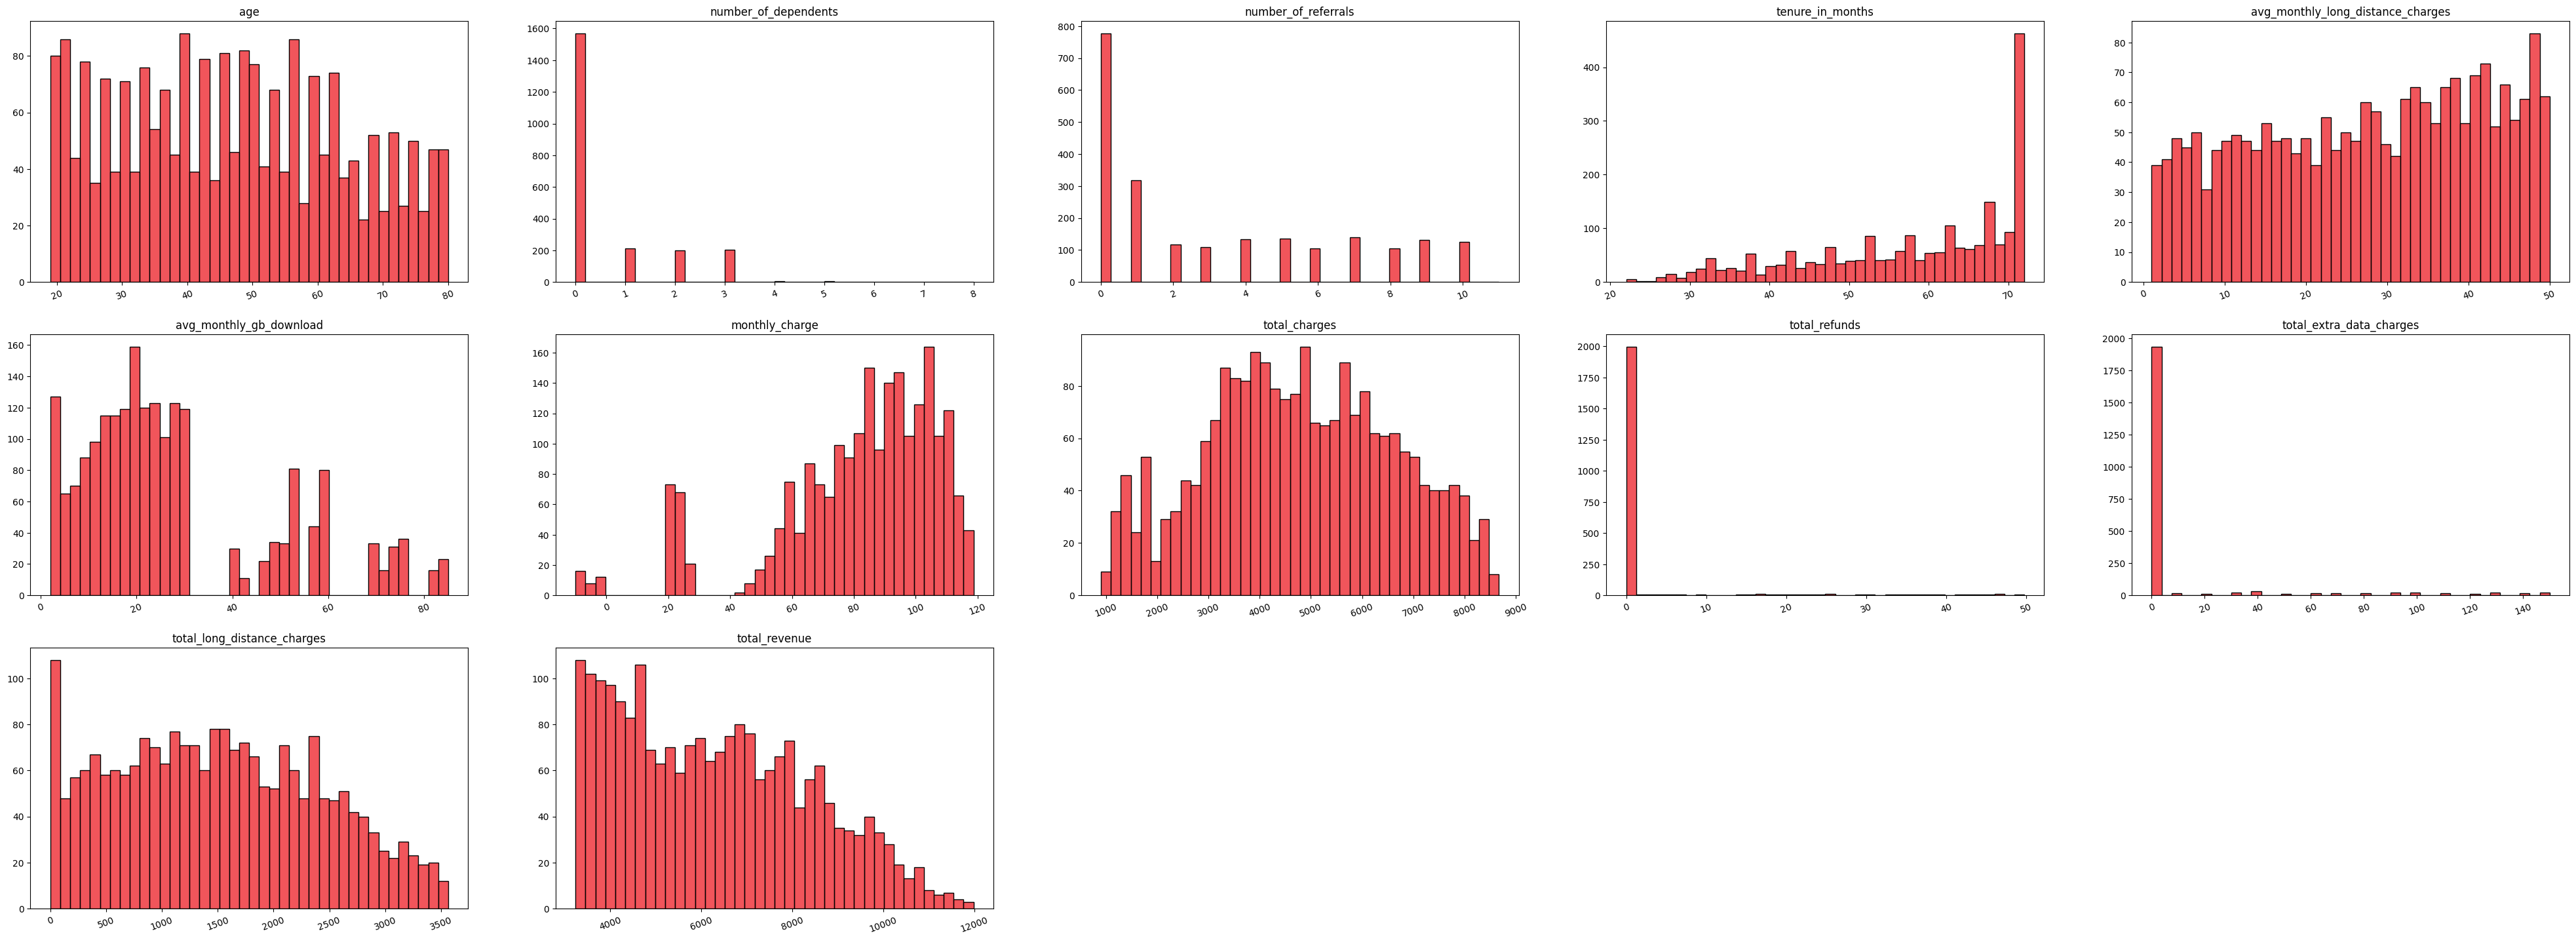

In [18]:
num = [cname for cname in df_high_value.columns if df_high_value[cname].dtype in ['int64', 'float64']]
_ = df_high_value[num]

fig = plt.figure(figsize=(50,30))

i = 1
for n in _.columns:
    plt.subplot(5,5,i)
    ax = sns.histplot(x= df_high_value[n], color= '#ED1C24', bins= 40)
    ax.set(xlabel= None, ylabel= None)
    plt.title(str(n), loc= None)
    plt.xticks(rotation= 20, fontsize= 10)
    i += 1

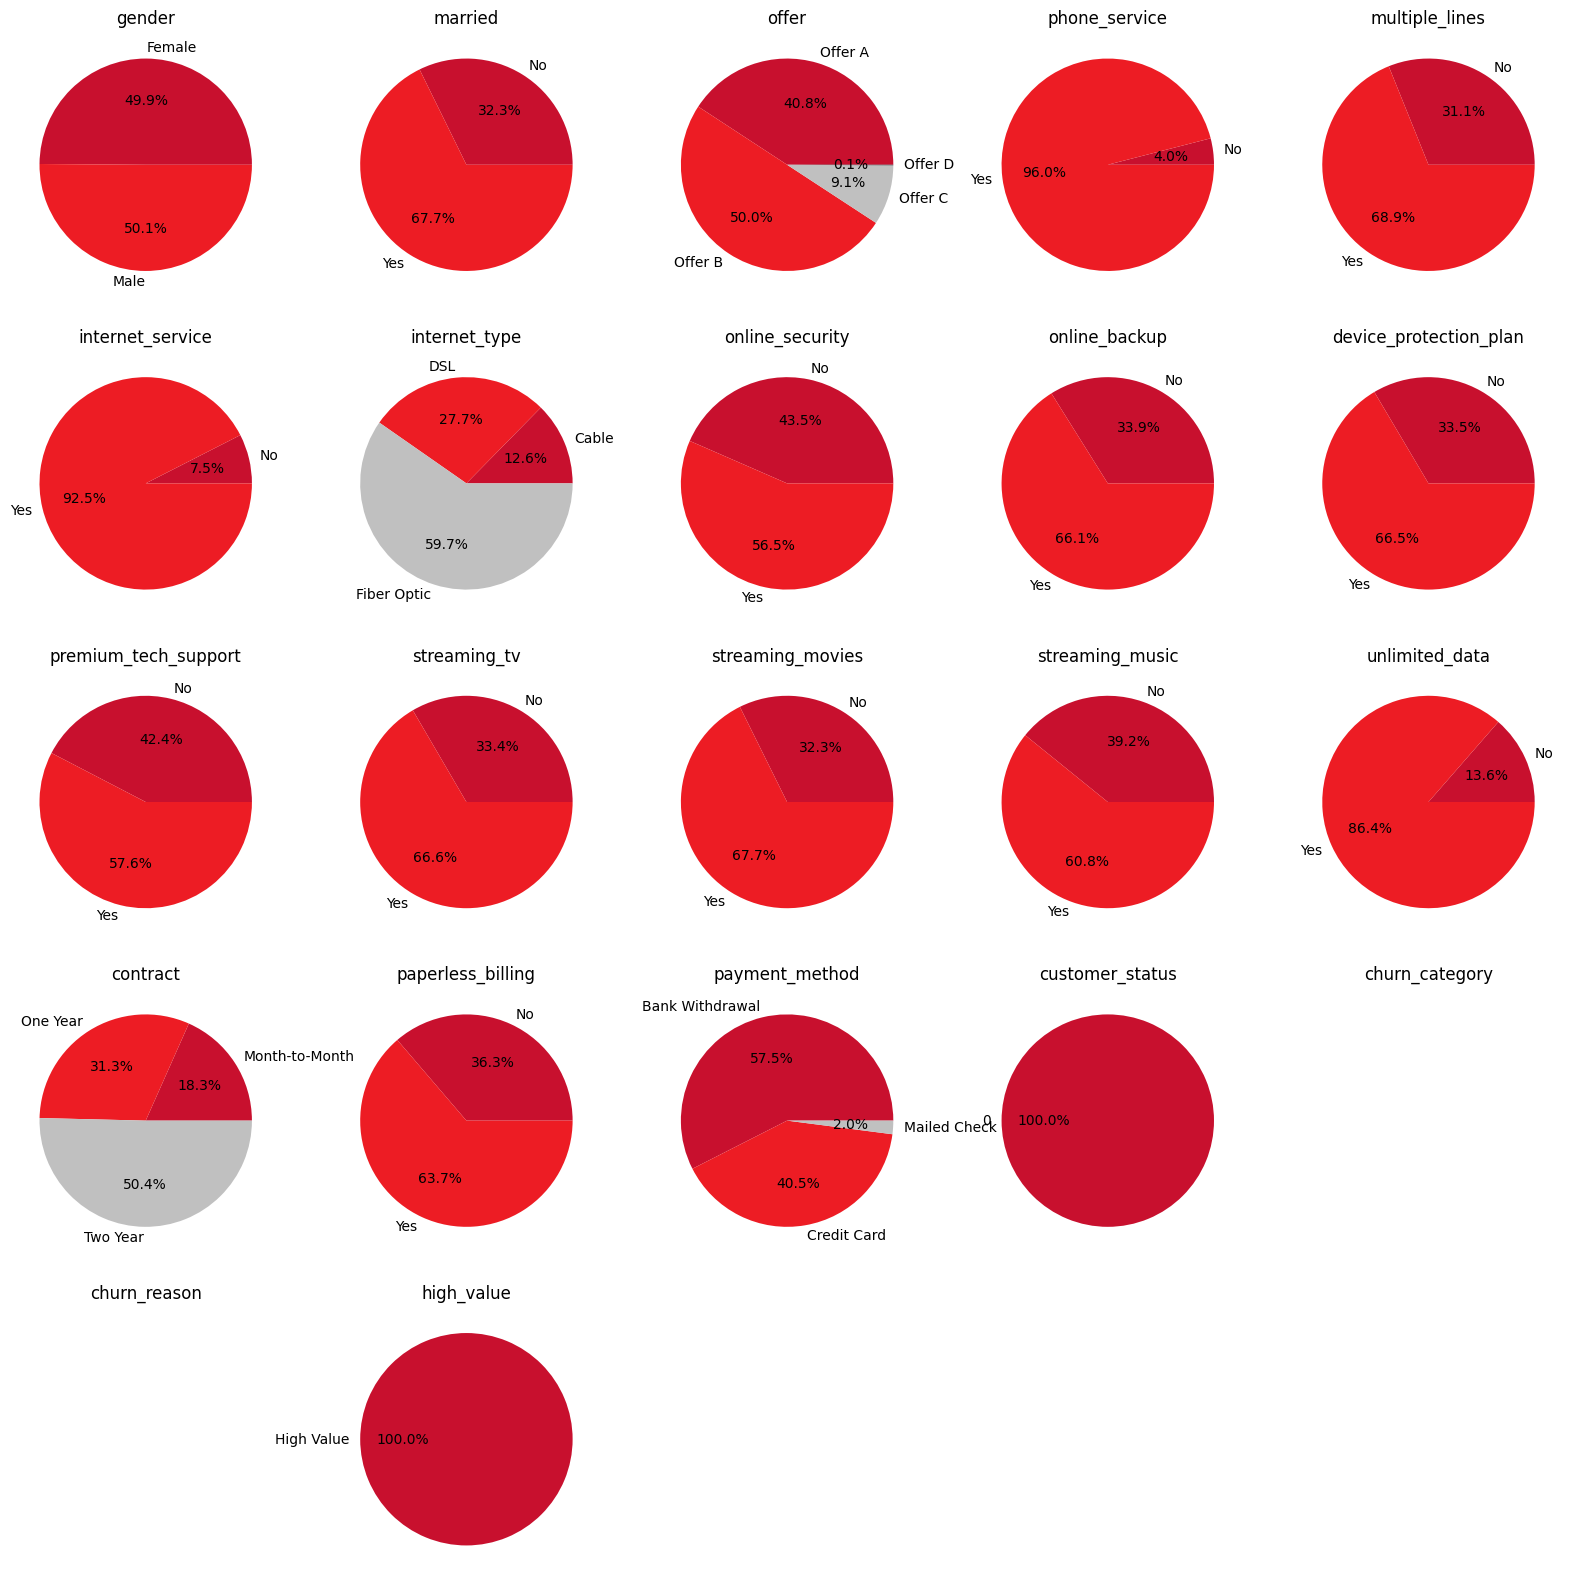

In [19]:
cat = [cname for cname in df_high_value.columns if df_high_value[cname].nunique() < 10 and df_high_value[cname].dtype == 'object']
_ = df_high_value[cat]

fig = plt.figure(figsize=(20,20))

i = 1
for c in _.columns:
    plt.subplot(5,5,i)
    ax = df_high_value.groupby([c]).size().plot(kind='pie', autopct = '%.1f%%', colors = ['#C8102E', '#ED1C24', '#C0C0C0', '#3B4248'])
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    i += 1

In [20]:
df_churned = dfc.loc[dfc['customer_status'] == 1]

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\s

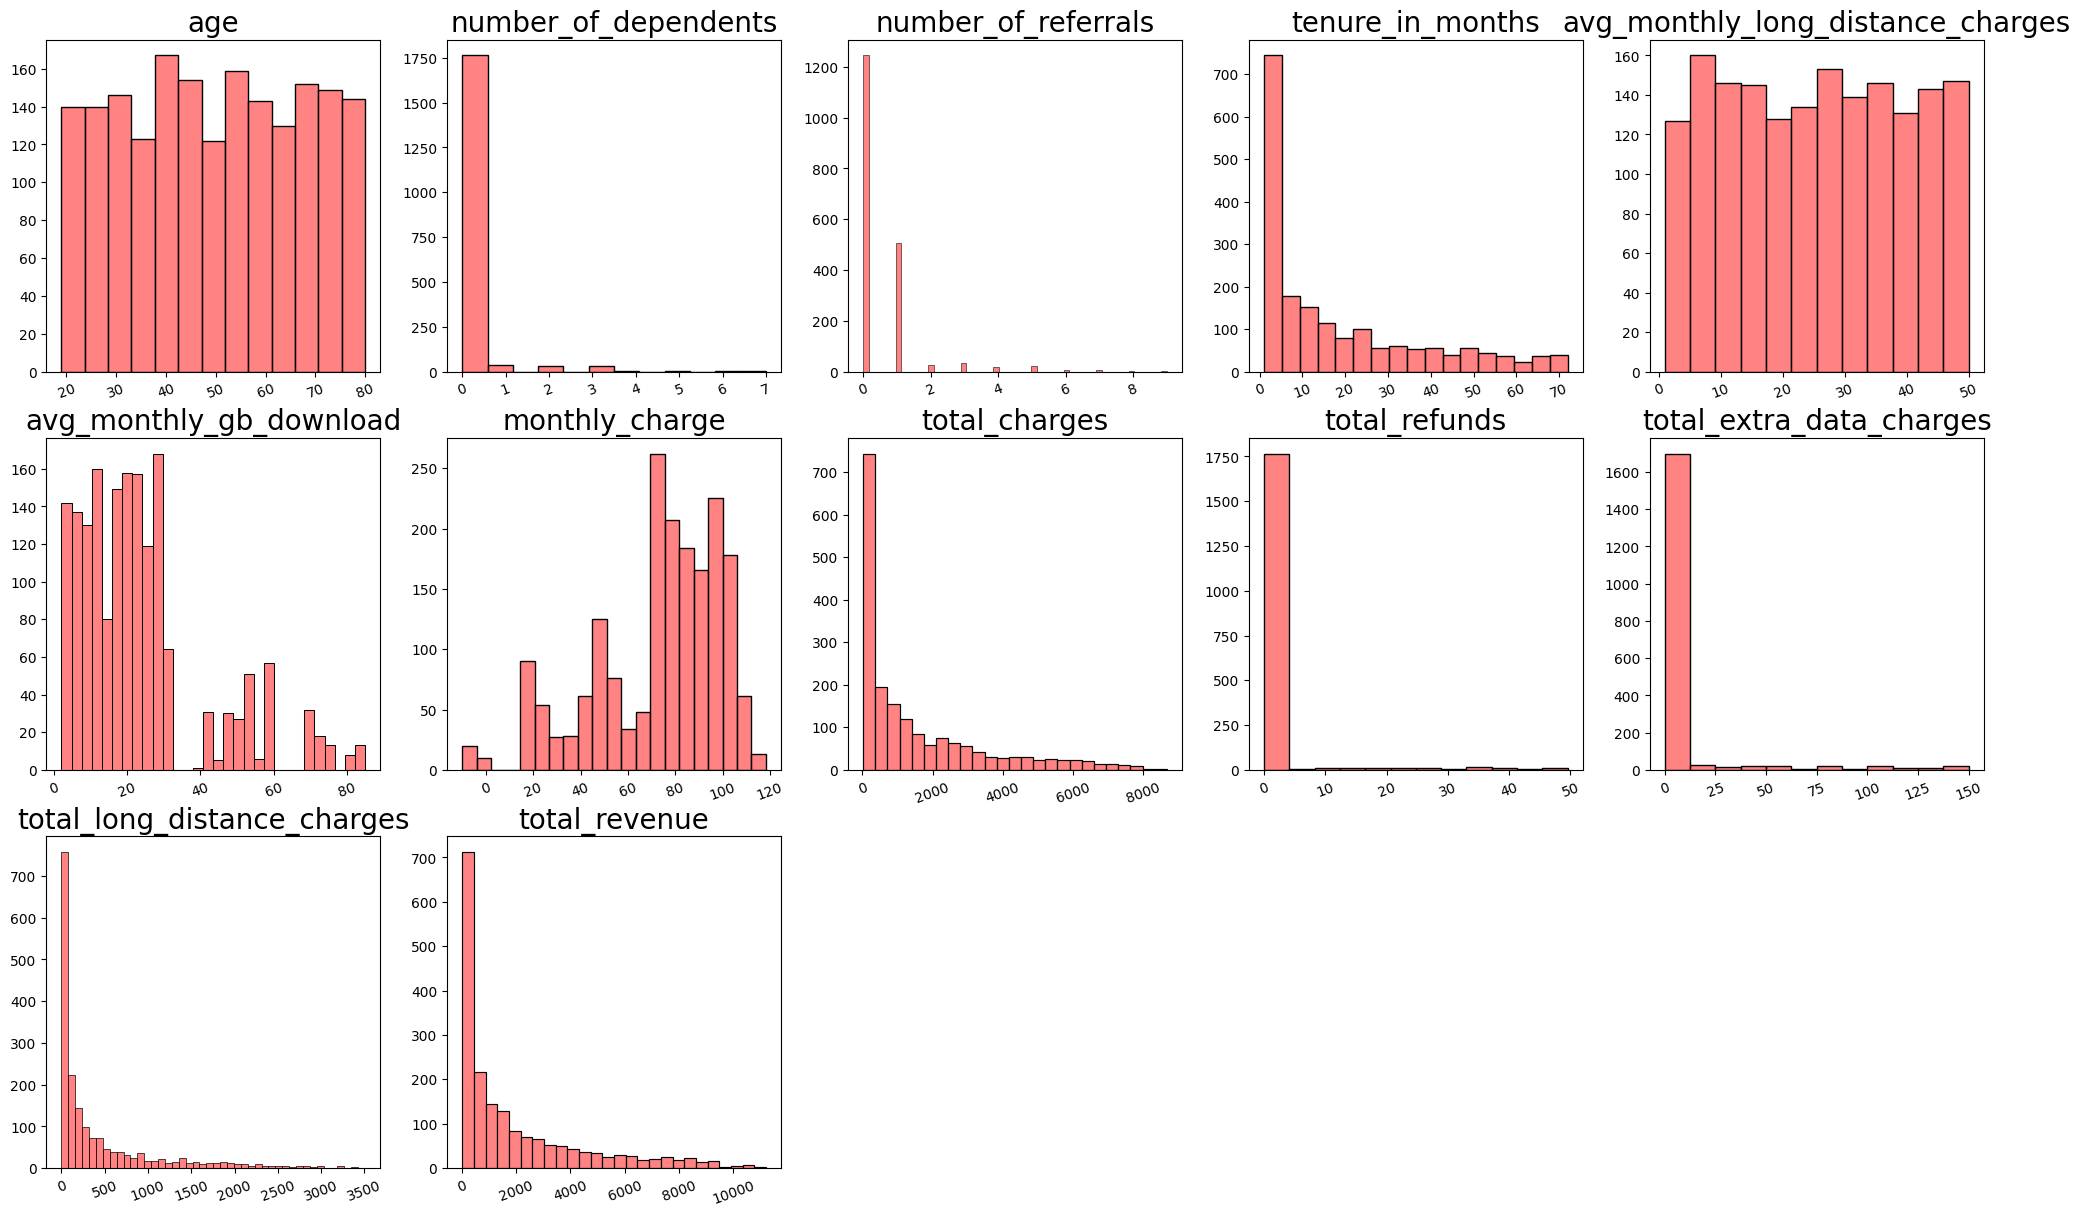

In [47]:
num = [cname for cname in df_churned.columns if df_churned[cname].dtype in ['int64',  'float64']]
_ = df_churned[num]

fig = plt.figure(figsize=(25,25))

i = 1
for n in _.columns:
    plt.subplot(5,5,i)
    ax = sns.histplot(x=df_churned[n], color='#FF5959')
    ax.set(xlabel=None, ylabel=None)
    ax.set_title(str(n), fontsize=20, loc='center')
    plt.xticks(rotation=20, fontsize=10)
    i += 1

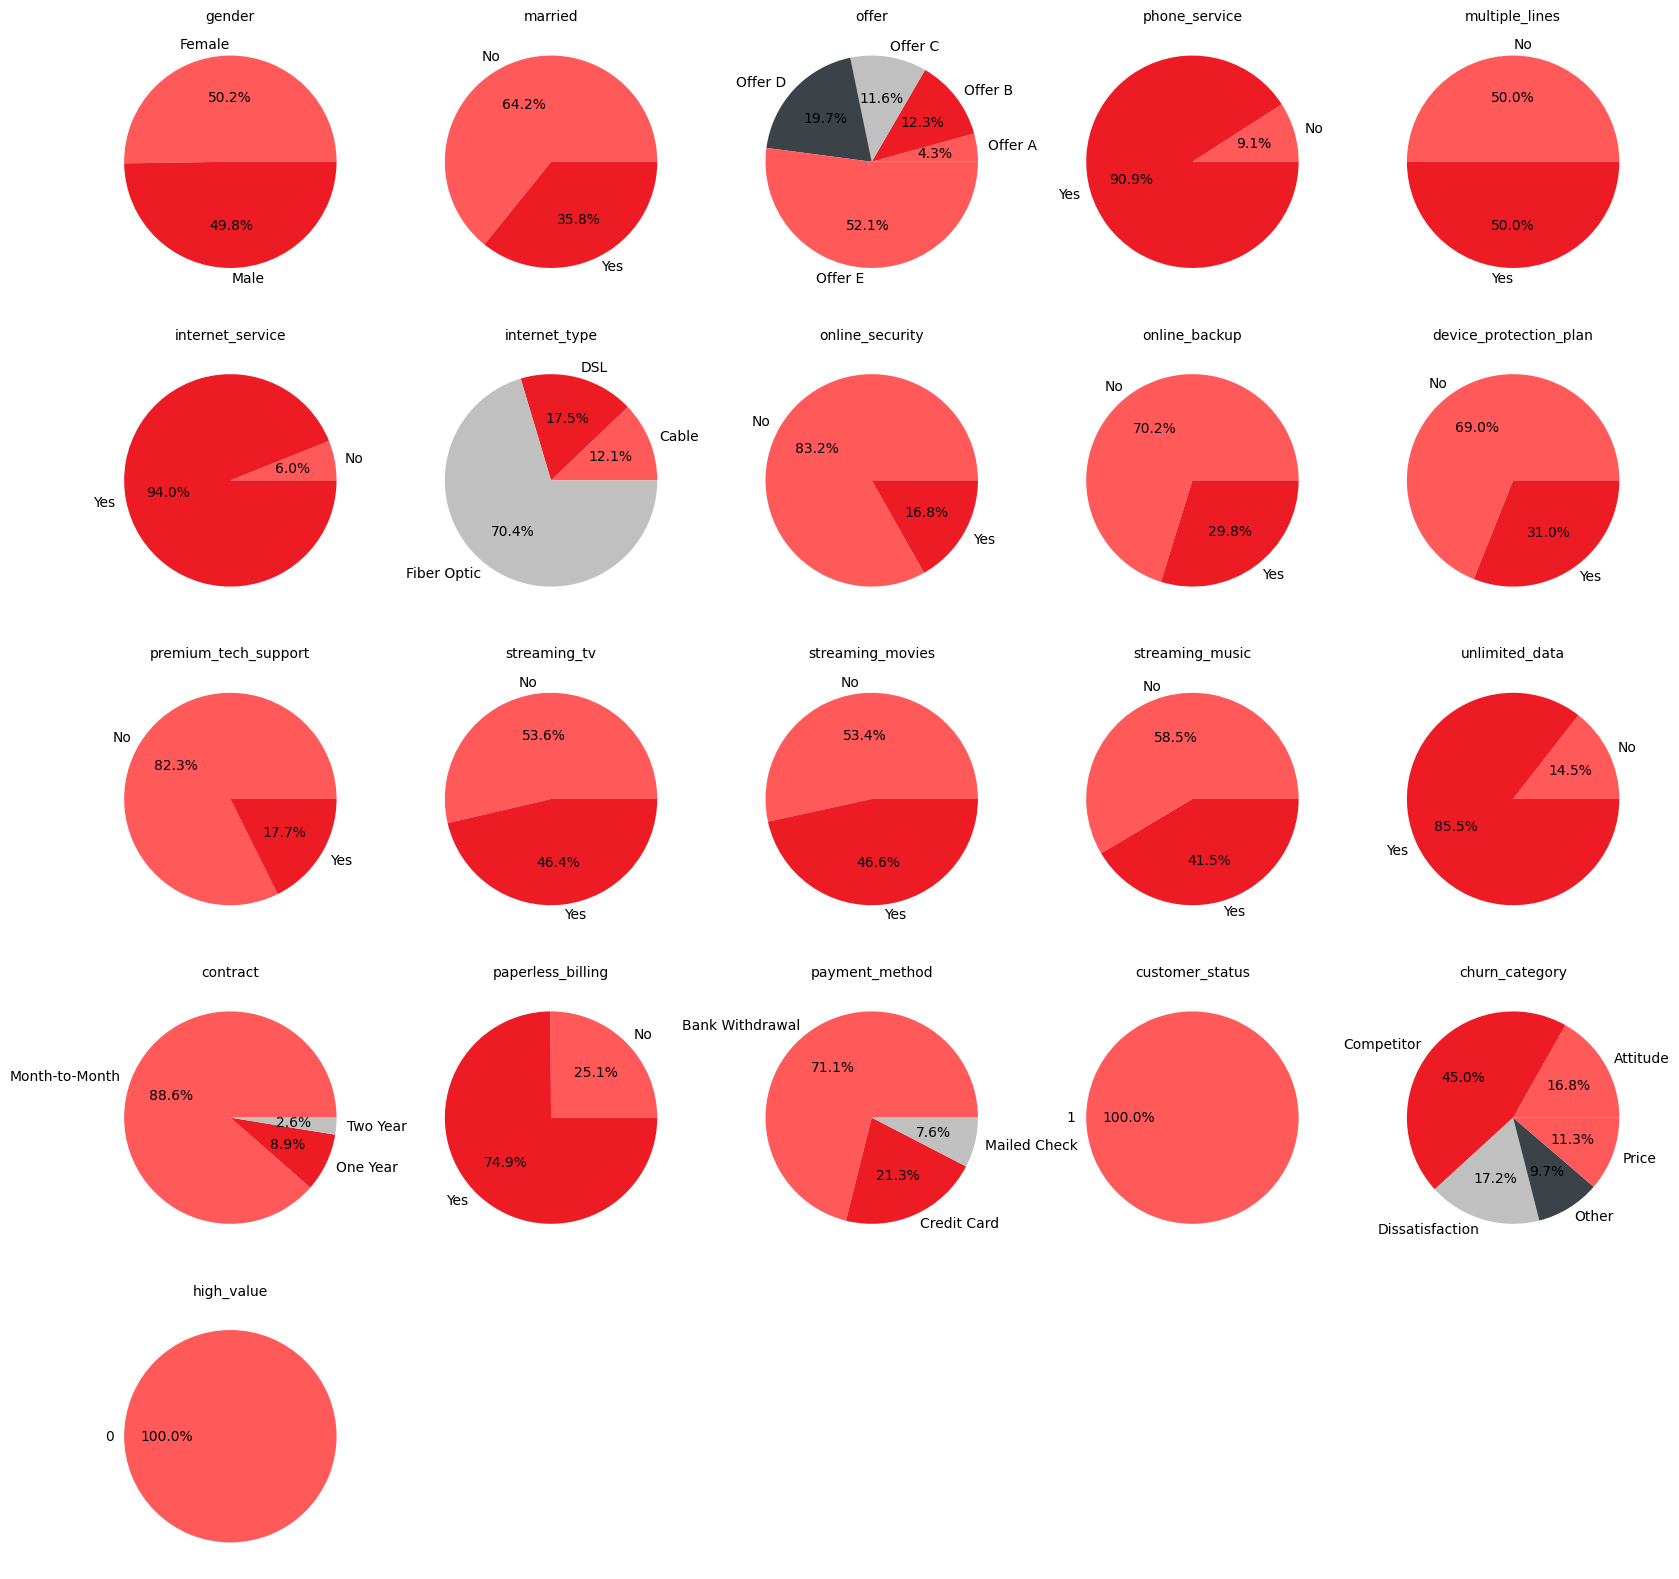

In [61]:
cat = [cname for cname in df_churned.columns if df_churned[cname].nunique() < 10 and df_churned[cname].dtype == 'object']
_ = df_churned[cat]

fig = plt.figure(figsize=(20,20))

i = 1
for c in _.columns:
    plt.subplot(5,5,i)
    ax =df_churned.groupby([c]).size().plot(kind='pie', autopct = '%.1f%%', colors=['#FF5959', '#ED1C24', '#C0C0C0', '#3B4248'])
    ax.set(xlabel=None, ylabel=None)
    ax.set_title(str(c), loc='center', fontsize=10)
    i += 1

##### Assessment of the Customer Groups
__High Value Customers Profile__

* 67.73% are married.
* They haven't purchased __Offer E__.
* More than half of these customers have subscribed to additional __internet services__ (i.e. backup, security, protection plan, tech support) and __streaming services__ (TV, movies, music).
* Out of the __81.66%__ who are subsribed to long term contracts, 50.39% opted for the two-year contract, and the remaining __31.27%__ went for one year.

__Churned Customers Profile__

* Only 35.79% are married.
* __Offer E__ appears to be the most popular offer around churned customers. Perhaps the company may want to review and look for potential pain points about this offer.
* More than half of churned customers haven't subscribed to additional __internet services and streaming services__.
* __88.55%__ choose to pay their bills at a monthly basis.

__What they have in common?__

* Equal distribution in terms of gender.
* __Fiber optic__ internet service is popular among both customer groups.
* Majority enjoy __unlimited data__.
* Majority prefers to receive __paperless billing__ and pay the bills by __bank withdrawal__.

##### __4. Propose Recommendations__
1. __Concentrate marketing efforts on the highest valuable customers__ (top 33% of the customers). This specific group of customers are known for being big spenders and their loyalty to the company. Consider creating an exclusive loyalty program filled with exclusive rewards just for them.
2. The most common cause for churning is due to the __superiority of the competitors' brand offers and services in terms of price and quality__. This underscores the company's attention to review the components of its value proposition and define its competitive advantage over competitors.
3. __Converting current month-to-month users to long term contract subscribers have been statistically shown to reduce the customer churn rate__. Amplify the conversion rate by providing content about the key functional benefits of applying for the subscription model.
4. __Attractively introduce the additional internet and streaming services to internet users__. There is a higher chance that they will retain and become high value customers after purchasing these add-on offers.
5. __Consider reviewing Offer E and identify its pain points which resulted in high churn rates__. Carefully assess across other related marketing offers that performed well and make pertinent changes and improvements out of it.

In [57]:
for c in df_churned.columns:
    if df_churned[c].nunique() < 10:
        print(c)

gender
married
number_of_dependents
offer
phone_service
multiple_lines
internet_service
internet_type
online_security
online_backup
device_protection_plan
premium_tech_support
streaming_tv
streaming_movies
streaming_music
unlimited_data
contract
paperless_billing
payment_method
customer_status
churn_category
high_value


In [59]:
df_churned.nunique()

gender                                  2
age                                    62
married                                 2
number_of_dependents                    8
city                                  777
number_of_referrals                    10
tenure_in_months                       72
offer                                   5
phone_service                           2
avg_monthly_long_distance_charges    1446
multiple_lines                          2
internet_service                        2
internet_type                           3
avg_monthly_gb_download                48
online_security                         2
online_backup                           2
device_protection_plan                  2
premium_tech_support                    2
streaming_tv                            2
streaming_movies                        2
streaming_music                         2
unlimited_data                          2
contract                                3
paperless_billing                 